# pandas 进阶修炼
<br>
本习题基于 `pandas` 版本 `1.1.3`，所有内容应当在 `Jupyter Notebook` 中执行以获得最佳效果。

不同版本之间写法可能会有少许不同，如若碰到此情况，你应该学会如何自行检索解决。

# 4 - 数据统计描述性分析


<br>


在上一章完成基本的数据预览以及缺失值和重复值的处理后。

下一个步骤就是对数据进行简单的统计描述性分析，进一步观察数据特征。

本章就整理了部分常见操作进行练习。

## 初始化

<br>

该 `Notebook` 版本为**习题+答案版**


请执行下方单元格以初始化读取本节习题的答案

执行完毕后，你可以使用 `ans(1)` 来查看第 1 题的参考解答，其余习题类似。

注意：所有答案并非固定（唯一），我提供的答案仅供参考（并非推荐答案或者最优解）

In [1]:
import sys
sys.path.append('../document/')
from inits import initialize,ans

res = initialize("../document/answer-4.txt")

***************正在初始化***************
*************读取到配置文件*************
***************初始化成功***************


## 加载数据

In [1]:
import pandas as pd
df = pd.read_excel("2020年中国大学排名.xlsx")

## 数据探索

### 1 - 查看数据

<br>

查看数据前 10 行

In [2]:
df.head(10)

,排名,学校名称,省市,学校类型,总分,办学层次得分,学科水平得分,办学资源得分,师资规模与结构得分,人才培养得分,科学研究得分,社会服务得分,高端人才得分,重大项目与成果得分,国际竞争力得分
0,1,清华大学,北京,综合,852.5,38.2,72.4,39.6,48.4,256.8,69.1,40.6,76.5,131.0,79.9
1,2,北京大学,北京,综合,746.7,36.1,73.1,24.6,49.2,237.6,71.0,16.2,71.9,105.8,61.2
2,3,浙江大学,浙江,综合,649.2,33.9,65.3,20.1,48.3,215.3,68.6,23.9,49.1,81.7,43.0
3,4,上海交通大学,上海,综合,625.9,35.4,53.6,22.1,43.8,192.8,81.2,18.1,45.8,93.0,40.1
4,5,南京大学,江苏,综合,566.1,35.1,47.8,10.3,47.4,218.6,59.6,5.3,42.0,71.2,29.0
5,6,复旦大学,上海,综合,556.7,36.6,48.4,14.9,46.3,198.5,65.7,6.5,42.9,62.0,34.8
6,7,中国科学技术大学,安徽,理工,526.4,40.0,39.1,10.6,45.9,191.5,52.6,0.2,55.1,49.2,42.2
7,8,华中科技大学,湖北,综合,497.7,31.9,45.2,11.3,44.2,182.8,58.3,22.0,25.5,44.9,31.8
8,9,武汉大学,湖北,综合,488.0,31.7,48.4,9.9,45.3,198.8,51.3,11.8,21.4,44.2,25.2
9,10,中山大学,广东,综合,457.2,30.3,47.1,13.7,46.8,154.4,65.9,5.6,27.1,33.8,32.6


### 2 - 修改索引

<br>

数据已经按照降序排列，让 学校 当索引会更好一点

-> 修改索引为 学校名称 列

In [16]:
df = df.set_index('学校名称')

### 3 - 查看数据量

也就是数据框的 行 * 列，总共单元格的数量

In [4]:
df.size

1500

### 4 - 数据排序

<br>

将数据按照总分升序排列，并展示前20个学校

备注：也就是看倒数20名啦

In [6]:
df.sort_values('总分').head(20)

,排名,学校名称,省市,学校类型,总分,办学层次得分,学科水平得分,办学资源得分,师资规模与结构得分,人才培养得分,科学研究得分,社会服务得分,高端人才得分,重大项目与成果得分,国际竞争力得分
99,100,广州大学,广东,综合,211.1,23.2,16.4,5.0,33.7,95.9,14.4,0.6,2.0,5.2,14.8
98,99,杭州电子科技大学,浙江,理工,211.6,25.4,12.6,2.7,36.5,103.4,12.0,2.5,1.5,2.6,12.3
97,98,上海师范大学,上海,师范,212.8,27.3,17.9,3.6,32.1,96.9,14.0,0.5,2.0,6.8,11.8
96,97,河南大学,河南,综合,212.9,24.2,22.7,3.4,32.5,97.5,15.7,2.1,1.3,4.2,9.2
95,96,南京邮电大学,江苏,综合,213.9,25.0,12.5,2.4,34.8,101.2,12.4,6.5,1.6,4.6,13.0
94,95,广东工业大学,广东,理工,214.2,24.2,15.5,3.7,32.6,96.7,13.8,3.2,3.1,5.3,16.2
93,94,湖北大学,湖北,综合,214.5,26.3,14.7,2.3,35.0,105.8,10.5,2.9,1.2,3.7,12.1
92,93,南京信息工程大学,江苏,理工,216.6,23.6,16.1,2.4,33.6,97.5,15.1,4.7,2.1,3.6,18.0
91,92,燕山大学,河北,理工,216.7,26.6,15.2,2.3,34.5,107.2,12.6,2.8,2.5,4.8,8.2
90,91,长安大学,陕西,理工,218.9,27.2,14.0,3.7,34.1,104.9,12.1,12.4,1.1,1.1,8.2


### 5 - 数据排序

将数据按照 高端人才得分 降序排序，展示前 10 位

In [7]:
df.sort_values('高端人才得分',ascending=False).head(10)

,排名,学校名称,省市,学校类型,总分,办学层次得分,学科水平得分,办学资源得分,师资规模与结构得分,人才培养得分,科学研究得分,社会服务得分,高端人才得分,重大项目与成果得分,国际竞争力得分
0,1,清华大学,北京,综合,852.5,38.2,72.4,39.6,48.4,256.8,69.1,40.6,76.5,131.0,79.9
1,2,北京大学,北京,综合,746.7,36.1,73.1,24.6,49.2,237.6,71.0,16.2,71.9,105.8,61.2
6,7,中国科学技术大学,安徽,理工,526.4,40.0,39.1,10.6,45.9,191.5,52.6,0.2,55.1,49.2,42.2
2,3,浙江大学,浙江,综合,649.2,33.9,65.3,20.1,48.3,215.3,68.6,23.9,49.1,81.7,43.0
3,4,上海交通大学,上海,综合,625.9,35.4,53.6,22.1,43.8,192.8,81.2,18.1,45.8,93.0,40.1
5,6,复旦大学,上海,综合,556.7,36.6,48.4,14.9,46.3,198.5,65.7,6.5,42.9,62.0,34.8
4,5,南京大学,江苏,综合,566.1,35.1,47.8,10.3,47.4,218.6,59.6,5.3,42.0,71.2,29.0
45,46,南方科技大学,广东,综合,289.0,26.7,7.1,16.9,41.9,105.0,26.4,1.0,38.9,7.1,18.0
9,10,中山大学,广东,综合,457.2,30.3,47.1,13.7,46.8,154.4,65.9,5.6,27.1,33.8,32.6
7,8,华中科技大学,湖北,综合,497.7,31.9,45.2,11.3,44.2,182.8,58.3,22.0,25.5,44.9,31.8


In [8]:
df.nlargest(10,'高端人才得分')

,排名,学校名称,省市,学校类型,总分,办学层次得分,学科水平得分,办学资源得分,师资规模与结构得分,人才培养得分,科学研究得分,社会服务得分,高端人才得分,重大项目与成果得分,国际竞争力得分
0,1,清华大学,北京,综合,852.5,38.2,72.4,39.6,48.4,256.8,69.1,40.6,76.5,131.0,79.9
1,2,北京大学,北京,综合,746.7,36.1,73.1,24.6,49.2,237.6,71.0,16.2,71.9,105.8,61.2
6,7,中国科学技术大学,安徽,理工,526.4,40.0,39.1,10.6,45.9,191.5,52.6,0.2,55.1,49.2,42.2
2,3,浙江大学,浙江,综合,649.2,33.9,65.3,20.1,48.3,215.3,68.6,23.9,49.1,81.7,43.0
3,4,上海交通大学,上海,综合,625.9,35.4,53.6,22.1,43.8,192.8,81.2,18.1,45.8,93.0,40.1
5,6,复旦大学,上海,综合,556.7,36.6,48.4,14.9,46.3,198.5,65.7,6.5,42.9,62.0,34.8
4,5,南京大学,江苏,综合,566.1,35.1,47.8,10.3,47.4,218.6,59.6,5.3,42.0,71.2,29.0
45,46,南方科技大学,广东,综合,289.0,26.7,7.1,16.9,41.9,105.0,26.4,1.0,38.9,7.1,18.0
9,10,中山大学,广东,综合,457.2,30.3,47.1,13.7,46.8,154.4,65.9,5.6,27.1,33.8,32.6
7,8,华中科技大学,湖北,综合,497.7,31.9,45.2,11.3,44.2,182.8,58.3,22.0,25.5,44.9,31.8


### 6 - 分列排名

<br>

查看各项得分最高的学校名称

In [13]:
df.set_index('学校名称').iloc[:,3:].idxmax()

总分               清华大学
办学层次得分       中国科学技术大学
学科水平得分           北京大学
办学资源得分           清华大学
师资规模与结构得分        北京大学
人才培养得分           清华大学
科学研究得分         上海交通大学
社会服务得分           清华大学
高端人才得分           清华大学
重大项目与成果得分        清华大学
国际竞争力得分          清华大学
dtype: object

In [10]:
df.iloc[:,4:].idxmax()

总分           0
办学层次得分       6
学科水平得分       1
办学资源得分       0
师资规模与结构得分    1
人才培养得分       0
科学研究得分       3
社会服务得分       0
高端人才得分       0
重大项目与成果得分    0
国际竞争力得分      0
dtype: int64

### 7 - 统计信息｜均值

计算总分列的均值

In [11]:
df['总分'].mean()

322.5

### 8 - 统计信息｜中位数

<br>

计算总分列的中位数

In [12]:
df['总分'].median()

279.65

### 9 - 统计信息｜众数


计算总分列的众数

In [14]:
df['总分'].mode()

0    233.4
Name: 总分, dtype: float64

### 10 -统计信息｜部分

计算 总分、高端人才得分、办学层次得分的最大最小值、中位数、均值

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html

In [15]:
df[['总分','高端人才得分','办学层次得分']].agg(['max','min','median','mean'])

,总分,高端人才得分,办学层次得分
max,852.50,76.500,40.000
min,211.10,0.800,23.200
median,279.65,6.150,29.400
mean,322.50,11.176,29.692


### 11 - 统计信息｜完整

<br>

查看数值型数据的统计信息（均值、分位数等），并保留两位小数

In [17]:
df.describe().round(2)

,排名,总分,办学层次得分,学科水平得分,办学资源得分,师资规模与结构得分,人才培养得分,科学研究得分,社会服务得分,高端人才得分,重大项目与成果得分,国际竞争力得分
count,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
mean,50.49,322.50,29.69,27.49,7.19,39.03,134.41,26.87,7.47,11.18,20.37,18.80
std,29.00,118.36,3.31,12.42,5.51,4.75,33.82,15.61,7.99,14.14,22.02,10.56
min,1.00,211.10,23.20,6.80,2.30,28.70,91.80,9.70,0.00,0.80,1.10,8.20
25%,25.75,244.18,27.30,19.65,3.98,35.98,109.08,15.68,2.20,3.08,7.48,12.70
50%,50.50,279.65,29.40,24.00,5.25,37.95,122.80,21.85,5.20,6.15,13.75,15.60
75%,75.25,378.80,31.90,33.92,9.02,43.20,154.75,32.72,9.80,12.35,24.78,21.00
max,100.00,852.50,40.00,73.10,39.60,49.20,256.80,81.20,40.60,76.50,131.00,79.90


In [18]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
排名,100.0,50.49,29.00,1.0,25.75,50.50,75.25,100.0
总分,100.0,322.50,118.36,211.1,244.18,279.65,378.80,852.5
办学层次得分,100.0,29.69,3.31,23.2,27.30,29.40,31.90,40.0
学科水平得分,100.0,27.49,12.42,6.8,19.65,24.00,33.92,73.1
办学资源得分,100.0,7.19,5.51,2.3,3.98,5.25,9.02,39.6
师资规模与结构得分,100.0,39.03,4.75,28.7,35.98,37.95,43.20,49.2
人才培养得分,100.0,134.41,33.82,91.8,109.08,122.80,154.75,256.8
科学研究得分,100.0,26.87,15.61,9.7,15.68,21.85,32.72,81.2
社会服务得分,100.0,7.47,7.99,0.0,2.20,5.20,9.80,40.6
高端人才得分,100.0,11.18,14.14,0.8,3.08,6.15,12.35,76.5


### 12 - 统计信息｜分组

计算各省市总分均值

In [19]:
df[['总分','省市']].groupby('省市').mean()

,总分
省市,
上海,350.510000
云南,234.100000
北京,362.827778
吉林,326.000000
四川,349.266667
天津,396.200000
安徽,328.700000
山东,304.633333
广东,286.011111


### 13 - 统计信息｜相关系数

<br>

也就是相关系数矩阵，也就是每两列之间的相关性系数

In [20]:
df.corr()

,排名,总分,办学层次得分,学科水平得分,办学资源得分,师资规模与结构得分,人才培养得分,科学研究得分,社会服务得分,高端人才得分,重大项目与成果得分,国际竞争力得分
排名,1.000000,-0.852880,-0.818345,-0.807731,-0.633034,-0.885262,-0.885034,-0.843434,-0.514412,-0.697178,-0.732042,-0.694733
总分,-0.852880,1.000000,0.793589,0.934838,0.836351,0.829229,0.959664,0.942001,0.589710,0.921307,0.953615,0.917179
办学层次得分,-0.818345,0.793589,1.000000,0.703688,0.651787,0.755698,0.797602,0.711259,0.417265,0.704239,0.739157,0.667455
学科水平得分,-0.807731,0.934838,0.703688,1.000000,0.716097,0.778855,0.889084,0.929943,0.480871,0.793909,0.901262,0.829870
办学资源得分,-0.633034,0.836351,0.651787,0.716097,1.000000,0.697620,0.730003,0.747226,0.463466,0.861156,0.812887,0.850934
师资规模与结构得分,-0.885262,0.829229,0.755698,0.778855,0.697620,1.000000,0.833277,0.806259,0.425790,0.715772,0.710717,0.705235
人才培养得分,-0.885034,0.959664,0.797602,0.889084,0.730003,0.833277,1.000000,0.885429,0.571678,0.830452,0.873353,0.828115
科学研究得分,-0.843434,0.942001,0.711259,0.929943,0.747226,0.806259,0.885429,1.000000,0.475609,0.855328,0.882416,0.831071
社会服务得分,-0.514412,0.589710,0.417265,0.480871,0.463466,0.425790,0.571678,0.475609,1.000000,0.457190,0.500942,0.533772
高端人才得分,-0.697178,0.921307,0.704239,0.793909,0.861156,0.715772,0.830452,0.855328,0.457190,1.000000,0.902862,0.909247


### 14 - 相关系数｜热力图

<br>

将上一题的相关性系数矩阵制作为热力图

In [21]:
df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\86159\AppData\Local\Temp\ipykernel_19600\3129850035.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,排名,总分,办学层次得分,学科水平得分,办学资源得分,师资规模与结构得分,人才培养得分,科学研究得分,社会服务得分,高端人才得分,重大项目与成果得分,国际竞争力得分
排名,1.00,-0.85,-0.82,-0.81,-0.63,-0.89,-0.89,-0.84,-0.51,-0.70,-0.73,-0.69
总分,-0.85,1.00,0.79,0.93,0.84,0.83,0.96,0.94,0.59,0.92,0.95,0.92
办学层次得分,-0.82,0.79,1.00,0.70,0.65,0.76,0.80,0.71,0.42,0.70,0.74,0.67
学科水平得分,-0.81,0.93,0.70,1.00,0.72,0.78,0.89,0.93,0.48,0.79,0.90,0.83
办学资源得分,-0.63,0.84,0.65,0.72,1.00,0.70,0.73,0.75,0.46,0.86,0.81,0.85
师资规模与结构得分,-0.89,0.83,0.76,0.78,0.70,1.00,0.83,0.81,0.43,0.72,0.71,0.71
人才培养得分,-0.89,0.96,0.80,0.89,0.73,0.83,1.00,0.89,0.57,0.83,0.87,0.83
科学研究得分,-0.84,0.94,0.71,0.93,0.75,0.81,0.89,1.00,0.48,0.86,0.88,0.83
社会服务得分,-0.51,0.59,0.42,0.48,0.46,0.43,0.57,0.48,1.00,0.46,0.50,0.53
高端人才得分,-0.70,0.92,0.70,0.79,0.86,0.72,0.83,0.86,0.46,1.00,0.90,0.91


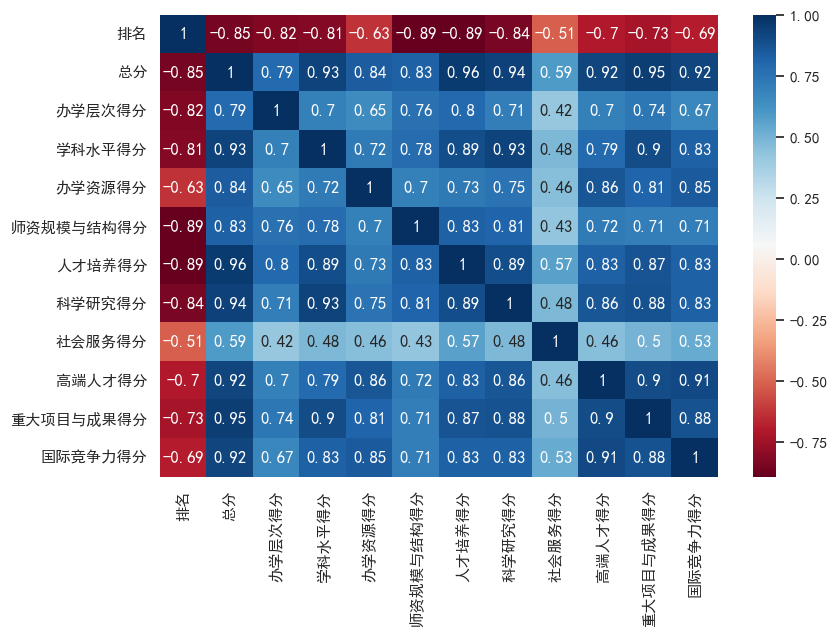

In [24]:
from tkinter import font
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False #显示负号

plt.figure(figsize=(9,6),dpi = 100)
#sns.set(font = 'Songti SC')
sns.heatmap(df.corr().round(2),annot=True,cmap='RdBu')
plt.show()

### 15 - 统计信息｜频率

计算各省市出现的次数

In [25]:
df['省市'].value_counts()

北京     18
江苏     15
上海     10
广东      9
湖北      7
陕西      7
浙江      4
四川      3
湖南      3
山东      3
安徽      3
天津      2
黑龙江     2
福建      2
吉林      2
辽宁      2
重庆      2
河南      2
甘肃      1
云南      1
江西      1
河北      1
Name: 省市, dtype: int64

### 16 - 统计信息｜热力地图

结合 `pyecharts` 将各省市高校上榜数量进行地图可视化

### 17 - 统计信息｜直方图

绘制总分的直方图、密度估计图

![公众号：早起Python](http://liuzaoqi.oss-cn-beijing.aliyuncs.com/2021/09/18/16319660121648.jpg?域名/sample.jpg?x-oss-process=style/stylename)

## 2 个 pandas EDA 插件

在 pandas 之外，还有两个插件可以快速实现 EDA

下面不作为习题，仅供介绍，感兴趣可以进一步搜索了解

执行全部代码即可获得 EDA 报告！

### 18 - pandas_profiling

<br>

如果没有提前安装 `pandas_profiling` 的话，需要提前 `pip` 进行安装

In [ ]:
! pip install pandas_profiling

In [105]:
import pandas_profiling

In [106]:
pandas_profiling.ProfileReport(df)

### 19 - sweetviz

如果没有提前安装 `sweetviz` 的话，需要提前 `pip` 进行安装

In [ ]:
! pip install sweetviz

In [ ]:
import sweetviz as sv

report = sv.analyze(df)
report.show_html()

执行完上面的代码后，当前目录下会出现一个html文件，打开即可看到相关 EDA 报告